# Unit 5 - Financial Planning


In [285]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [286]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [287]:
# Setting the current amount of crypto assets in posession

my_btc = 1.2
my_eth = 5.3

In [288]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [289]:
# Fetching the current BTC price
# Turned Fetched data into a readable Json file to see where the current CAD price is located in the dictionary

btc_data = requests.get(btc_url).json()

import json

print(json.dumps(btc_data, indent=10))

{
          "data": {
                    "1": {
                              "id": 1,
                              "name": "Bitcoin",
                              "symbol": "BTC",
                              "website_slug": "bitcoin",
                              "rank": 1,
                              "circulating_supply": 18654162,
                              "total_supply": 18654162,
                              "max_supply": 21000000,
                              "quotes": {
                                        "USD": {
                                                  "price": 60102.0,
                                                  "volume_24h": 50094970369,
                                                  "market_cap": 1124701480874,
                                                  "percentage_change_1h": 0.189170618169998,
                                                  "percentage_change_24h": -1.43962569270805,
                                            

In [290]:
#Declaring the btc CAD price location within the dictionary
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]

In [291]:
# Fetchting the current ETH price, going through the same steps as above with BTC.

eth_data = requests.get(eth_url).json()

import json

print(json.dumps(eth_data, indent=10))

{
          "data": {
                    "1027": {
                              "id": 1027,
                              "name": "Ethereum",
                              "symbol": "ETH",
                              "website_slug": "ethereum",
                              "rank": 2,
                              "circulating_supply": 115053861,
                              "total_supply": 115053861,
                              "max_supply": 0,
                              "quotes": {
                                        "USD": {
                                                  "price": 1885.54,
                                                  "volume_24h": 26808341575,
                                                  "market_cap": 217488239496,
                                                  "percentage_change_1h": -0.100716936268703,
                                                  "percentage_change_24h": -1.04339791315223,
                                         

In [292]:
#Declaring the eth cad price location within the dictionary
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

In [293]:
# Computing the current value of crpto portfolio, printing the results to check if the values are correct
print(btc_price)
print(eth_price)

my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# here we are calculating the combined value of the crypto portfolio

total_crypto_value = round((my_btc_value + my_eth_value),2)

74929.1634
2350.702718


In [301]:
# Printing current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} CAD")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} CAD")
print(f"The current combined value of your cryptos is ${total_crypto_value:0.2f} CAD")

The current value of your 1.2 BTC is $89915.00 CAD
The current value of your 5.3 ETH is $12458.72 CAD
The current combined value of your cryptos is $102373.72 CAD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [302]:
# Current amount of shares
my_spy = 200
my_agg = 50

In [303]:
# Setting the Alpaca API key and secret-key inorder to fetch data from alpaca website.
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Created an Alpaca API object to tell alpaca what data we want to acesss 

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url="https://paper-api.alpaca.markets",
    api_version = "v2"
)


In [304]:
# Format current date as ISO format, so alpaca understands which dates data we want to retrive 
today = pd.Timestamp("2021-03-12", tz="America/New_York").isoformat()

# Setting the tickers we want to retrive for our portfolio data
tickers = ["AGG","SPY"]

# Set timeframe to '1D' for Alpaca API- this brings us the daily data
timeframe = "1D"

# Get current closing prices for SPY and AGG using a alpaca SDK
# we are also setting the start and end date the same to get data on the latest date
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today,
    limit=1000
).df

# Preview DataFrame
df_ticker.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-03-12 00:00:00-05:00  113.88  113.91  113.705  113.79  4339393  392.07   

                                                            
                             high    low   close    volume  
time                                                        
2021-03-12 00:00:00-05:00  394.21  391.2  394.09  56997361

In [305]:
# Pick AGG and SPY close prices
# here we are creating a new data frame to house only the closing prices
df_closing_prices = pd.DataFrame()

df_closing_prices["AGG"] = df_ticker["AGG"]["close"]
df_closing_prices["SPY"] = df_ticker["SPY"]["close"]

In [306]:
# we are setting the values for the closing prices
agg_close_price = df_closing_prices.iloc[0][0]
spy_close_price = df_closing_prices.iloc[0][1]


In [307]:
# Printing AGG and SPY closing prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.79
Current SPY closing price: $394.09


In [308]:
# Computing the current value of shares
# here we are multiplying the closing price by the number of shares/bonds they currently hold.
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# By adding both the total SPY value and AGG value we get the total value of the portfolio
total_share_value = round((my_spy_value + my_agg_value),2)

# Print current value of shares/bonds
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current combined value of your AGG & SPY shares is ${total_share_value:0.2f}")

The current value of your 200 SPY shares is $78818.00
The current value of your 50 AGG shares is $5689.50
The current combined value of your AGG & SPY shares is $84507.50


### Savings Health Analysis

In [309]:
# Setting the monthly household income
monthly_income = 12000.0

In [313]:
# Creating a savings DataFrame
# I am setting the index column to display the two types of asset classes in our portfolio, which are shares and crypto
# As well as creating a column to display the total amount currently in each asset class

amount_data = { 
    "Amount":[total_share_value,total_crypto_value]
}

asset_class = ["Shares","Crypto"]
df_savings = pd.DataFrame(amount_data,index=asset_class)

# Displaying the savings DataFrame
display(df_savings)

,Amount
Shares,84507.50
Crypto,102373.72


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='Amount'>

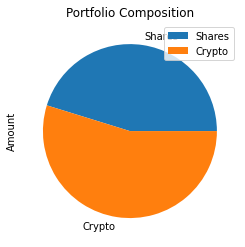

In [311]:
# Plotting the savings portfolio pie chart
df_savings.plot.pie(y="Amount", title="Portfolio Composition")

In [314]:
# calculating the ideal emergency fund total
emergency_fund = monthly_income * 3

# Calculating total amount of savings they currently have 
total_savings = total_share_value + total_crypto_value


emergency_fund_diff = emergency_fund - total_savings

# Validating the person's savings health
# If their total savings is greater than the emergency fund amount, they've reached their savings goal.
# If their total savings is equal to the emergency fund amount, they've reached their savings goal.
# If their total savings is less than the emergency fund ammount, they have not met their savings goal.

if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have reached your emergency fund financial goal.")
elif total_savings < emergency_fund:
    print(f"You are ${emergency_fund_diff} , away from your emergency savings goal.")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [315]:
# Setting the start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-12', tz='America/New_York').isoformat()

In [317]:
# Getting 5 years' worth of historical data for SPY and AGG
# Was only able to fetch 1000 lines of data per symbol. Limited by alpaca api

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()


AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2017-03-22 00:00:00-04:00  108.44  108.54  108.3600  108.430  2260513.0   
2017-03-23 00:00:00-04:00  108.44  108.51  108.2635  108.450  1920280.0   
2017-03-24 00:00:00-04:00  108.35  108.51  108.3100  108.370  2249110.0   
2017-03-27 00:00:00-04:00  108.65  108.71  108.5345  108.605  1811277.0   
2017-03-28 00:00:00-04:00  108.63  108.68  108.3500  108.380  1804002.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-03-22 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-03-23 00:00:00-04:00  233.99  235.34  233.60  234.01  76534784.0  
2017-03-24 00:00:00-04:00  234.38  235.04  232.96  233.90  82201507.0  
2017-03-27 00:00:00-04:00  231.93  233.92  231.61  233.58  67180329.0  
2017-03-28 00:00:00-04:00  233.27  235.81  233.14  235.27  64554450.0

In [320]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Setting the number of simulations to 500, with weights of 40% bonds, and 60% stocks
MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [321]:
# Printing the simulation input data
MC_portfolio.portfolio_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2017-03-22 00:00:00-04:00  108.44  108.54  108.3600  108.430  2260513.0   
2017-03-23 00:00:00-04:00  108.44  108.51  108.2635  108.450  1920280.0   
2017-03-24 00:00:00-04:00  108.35  108.51  108.3100  108.370  2249110.0   
2017-03-27 00:00:00-04:00  108.65  108.71  108.5345  108.605  1811277.0   
2017-03-28 00:00:00-04:00  108.63  108.68  108.3500  108.380  1804002.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-03-22 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-03-23 00:00:00-04:00     0.000184  233.99  235.34  233.60  234.01   
2017-03-24 00:00:00-04:00    -0.000738  234.38  235.04  232.96  233.90   
2017-03-27 00:00:00-04:00     0.002168  231.93  233.92  231.61  233.58   
2017-03-28 00:00:00-04:00    -0.002072  233.27  235.81  233.14  235.27   

                                                    
                               volume daily_return  
time                                                
2017-03-22 00:00:00-04:00         NaN          NaN  
2017-03-23 00:00:00-04:00  76534784.0          NaN  
2017-03-24 00:00:00-04:00  82201507.0    -0.000470  
2017-03-27 00:00:00-04:00  67180329.0    -0.001368  
2017-03-28 00:00:00-04:00  64554450.0     0.007235

In [322]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987818,1.009239,1.003507,1.019090,0.997545,1.016121,0.991806,0.999118,0.998117,0.997508,...,0.989765,1.005515,1.002717,0.998961,0.996363,1.005264,1.012033,0.991127,0.993250,0.991906
2,0.977670,1.019742,0.991302,1.008069,0.985340,1.007410,0.988454,1.000834,1.009824,0.987257,...,0.984580,1.003976,1.007648,1.004153,0.995373,1.017952,1.008969,0.990888,0.994089,0.981238
3,0.988133,1.011303,0.998820,1.013813,0.993063,1.012812,0.991575,1.007847,1.013353,0.993184,...,0.978102,1.008077,1.009408,0.997312,1.002097,1.016971,1.022243,0.999265,0.983481,0.984686
4,0.986755,1.009698,0.994271,1.021804,0.981682,1.018292,0.994503,0.998976,1.008450,1.003586,...,0.986538,0.998274,1.010777,1.000506,0.999416,1.014774,1.024975,0.991738,0.983815,0.976313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,43.792458,30.923111,9.263156,19.335929,19.757976,19.128130,13.648839,29.369516,33.804494,8.927771,...,10.700567,16.966619,17.035054,17.645892,9.859228,6.261117,10.793323,11.887399,8.368042,15.820239
7557,43.390762,31.039812,9.179155,19.411646,19.684729,19.091520,13.745923,29.146963,33.714207,9.023181,...,10.687474,16.914992,16.950858,17.881522,9.990724,6.169919,10.721885,12.084187,8.345597,16.042568
7558,42.989457,30.691597,9.234175,19.486511,19.611759,19.188519,13.782600,29.399121,33.979351,9.051023,...,10.686141,16.866658,16.914195,17.915989,10.011874,6.121130,10.617775,11.972605,8.366992,15.925254
7559,42.876532,30.203383,9.207612,19.628152,19.547579,18.992738,13.968588,29.266715,33.242513,8.993764,...,10.751794,16.896170,17.049126,18.140279,10.027104,6.131468,10.686429,12.013900,8.409333,15.877346


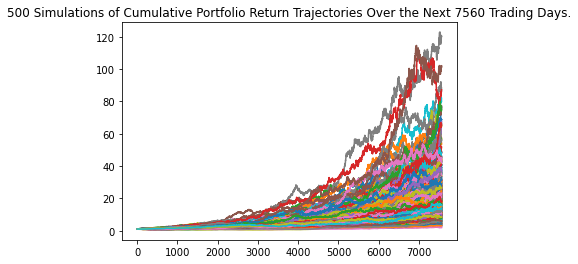

In [323]:
# Plotting simulation outcomes
porfolio_line_plot = MC_portfolio.plot_simulation()

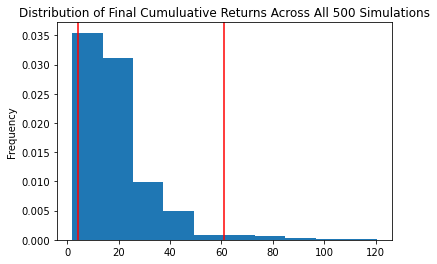

In [324]:
# Plot probability distribution and confidence intervals
portfolio_dist_plot = MC_portfolio.plot_distribution()

### Retirement Analysis

In [325]:
# Fetch summary statistics from the Monte Carlo simulation results
portfolio_stats = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(portfolio_stats)

count           500.000000
mean             19.461381
std              14.673440
min               1.945556
25%              10.019441
50%              15.466025
75%              24.402449
max             120.349472
95% CI Lower      4.180979
95% CI Upper     61.084705
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [332]:
# Set initial investment
initial_investment = 20000.00

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(portfolio_stats[8]*initial_investment,2)
ci_upper = round(portfolio_stats[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000.0 in the portfolio over the next 30 years will end within in the range of $83619.59 and $1221694.09


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [329]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_2 = round(portfolio_stats[8]*initial_investment_2,2)
ci_upper_2 = round(portfolio_stats[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $125429.38 and $1832541.14


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [336]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Changing the weights of the portfolio to 20% bonds and 80% stocks
MC_portfolio_5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,0.80],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [337]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994674,1.003371,0.990933,0.999282,1.007499,1.007953,0.997552,0.982076,1.003649,1.008491,...,1.006447,0.992644,1.009621,0.996156,0.989360,0.997931,1.018020,0.998005,1.005653,0.992568
2,0.987306,1.022552,0.998948,0.996518,1.001480,1.033263,1.005046,0.986592,0.999068,1.021527,...,1.002717,0.994652,1.009605,1.009006,0.992232,0.999244,1.018853,0.999610,1.007773,0.983875
3,0.985013,1.022678,0.988082,1.007726,0.990977,1.045265,1.008726,0.988341,1.001514,1.033758,...,1.019910,0.984921,1.019440,1.011256,0.999198,1.003059,1.038446,0.991778,1.032553,0.966337
4,0.993780,1.031617,0.992399,0.993903,0.978937,1.035171,1.008206,0.982854,0.976960,1.046324,...,0.998769,1.007699,1.031747,1.001377,1.014169,1.000240,1.050611,1.002645,1.048620,0.950265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.231804,1.958075,2.112458,1.651038,1.220123,1.604605,1.832579,0.993306,1.676840,1.979107,...,0.886443,1.603430,2.398429,1.516797,2.013629,0.842104,1.667925,1.106574,0.989855,2.477903
1257,1.207155,1.972814,2.105312,1.647764,1.222977,1.615857,1.833286,1.013899,1.696761,1.967758,...,0.901968,1.583605,2.422912,1.504819,1.957901,0.842637,1.678524,1.099629,0.992349,2.478243
1258,1.195955,1.948933,2.101637,1.636220,1.219303,1.643689,1.820342,1.021556,1.715506,1.963561,...,0.905924,1.595874,2.410446,1.485819,1.924959,0.840119,1.661733,1.088863,1.006027,2.490070
1259,1.178686,1.924082,2.088521,1.640706,1.211148,1.644558,1.838345,1.030951,1.721730,1.960818,...,0.907528,1.620837,2.386780,1.485798,1.956844,0.824326,1.642182,1.082047,1.016887,2.456481


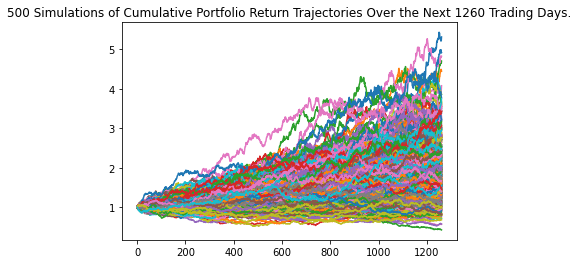

In [338]:
# Plotting simulation outcomes
porfolio_5yr_line_plot = MC_portfolio_5yr.plot_simulation()

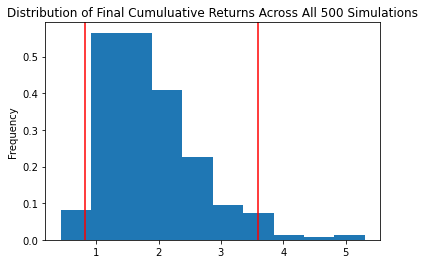

In [339]:
# Plotting probability distribution and confidence intervals
portfolio_5yr_dist_plot = MC_portfolio_5yr.plot_distribution()

In [340]:
# Fetching summary statistics from the Monte Carlo simulation results
portfolio_5yr_stats = MC_portfolio_5yr.summarize_cumulative_return()
# Printing summary statistics

print(portfolio_5yr_stats)

count           500.000000
mean              1.862903
std               0.743470
min               0.426855
25%               1.338838
50%               1.693507
75%               2.259370
max               5.309197
95% CI Lower      0.824314
95% CI Upper      3.601028
Name: 1260, dtype: float64


In [341]:
# Setting initial investment to $60000 dollars

initial_investment_5yr = 60000.00

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000 investment
ci_lower_five = round(portfolio_5yr_stats[8]*initial_investment_5yr,2)
ci_upper_five = round(portfolio_5yr_stats[9]*initial_investment_5yr,2)

# Printing the results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yr} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000.0 in the portfolio over the next 5 years will end within in the range of $49458.86 and $216061.69


### Ten Years Retirement Option

In [342]:
# Configuring a Monte Carlo simulation to forecast 10 years of cumulative returns
# with portfolio weights of 20% bonds and 80% stocks

MC_portfolio_10yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,0.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [343]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996660,1.017717,1.006162,1.014483,0.999582,0.981671,0.991075,1.003393,1.004254,0.980151,...,0.999557,1.010831,1.004148,0.990794,1.001482,1.001821,0.988824,0.991478,0.971632,0.987677
2,1.005825,1.028357,1.006459,1.014234,0.993739,0.982211,0.999539,1.003743,0.999835,0.986009,...,1.003983,1.019065,1.010052,0.992725,0.988774,1.014076,0.971483,0.994720,0.969538,0.992064
3,0.989711,1.031848,1.007813,1.009169,1.000589,0.980652,1.010133,1.005945,0.995200,0.983915,...,0.995717,1.010680,0.987460,0.978214,0.970939,1.017471,0.975432,0.989404,0.992446,0.982197
4,0.995998,1.019168,1.010257,1.002092,1.009057,0.990201,1.019404,1.009204,0.996483,0.977404,...,0.978958,1.006307,0.968265,0.982620,0.981690,1.013617,0.976906,1.005520,0.976391,0.973185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.920523,4.116169,2.998575,2.194965,2.362129,7.917567,4.190521,1.375389,1.603687,8.398412,...,3.595955,5.246141,2.375911,3.565690,4.271582,2.404465,2.709237,1.835669,2.067277,1.957048
2517,1.942289,4.062954,2.991799,2.174125,2.341779,7.929877,4.217732,1.397337,1.620362,8.490310,...,3.598702,5.187416,2.373524,3.536603,4.244270,2.379100,2.725026,1.842686,2.057537,1.958478
2518,1.935152,4.063974,3.031847,2.146548,2.388144,7.906969,4.153387,1.390844,1.626608,8.463385,...,3.648204,5.214349,2.389883,3.574376,4.279436,2.364687,2.733447,1.842882,2.031362,1.964211
2519,1.908277,4.058263,3.036255,2.180678,2.394311,7.801692,4.156253,1.389969,1.614252,8.475173,...,3.580179,5.166321,2.382857,3.534669,4.249917,2.361980,2.732959,1.842378,2.043334,2.007610


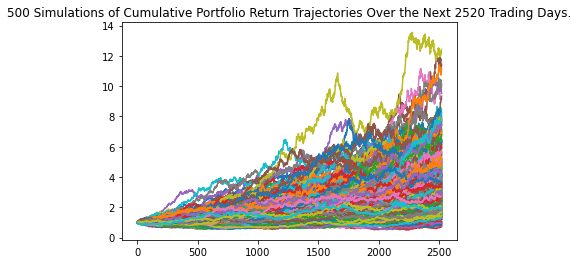

In [344]:
# Plot simulation outcomes
porfolio_10yr_line_plot = MC_portfolio_10yr.plot_simulation()

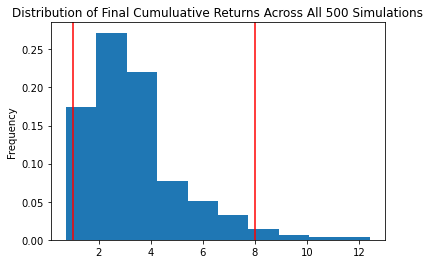

In [345]:
# Plot probability distribution and confidence intervals
portfolio_10yr_dist_plot = MC_portfolio_10yr.plot_distribution()

In [346]:
# Fetching our summary statistics from the 10yr Monte Carlo simulation results
portfolio_10yr_stats = MC_portfolio_10yr.summarize_cumulative_return()

# Print summary statistics
print(portfolio_10yr_stats)

count           500.000000
mean              3.375926
std               1.852781
min               0.730665
25%               2.036342
50%               3.004745
75%               4.089687
max              12.429180
95% CI Lower      1.016497
95% CI Upper      7.993302
Name: 2520, dtype: float64


In [348]:
# Setting pur initial investment to $60000
initial_investment_10yr = 60000.00

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(portfolio_10yr_stats[8]*initial_investment_10yr,2)
ci_upper_ten = round(portfolio_10yr_stats[9]*initial_investment_10yr,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10yr} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000.0 in the portfolio over the next 10 years will end within in the range of $60989.82 and $479598.12
